In [ ]:
# Setup
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# imports
sys.path.append(os.path.abspath(".."))
from answer_categories import question_orders
from lists import comparison_pairs_by_AI_questions, single_choice_questions, multiple_choice_questions
from Helper_funtions import (
    calculate_true_false_score,
    clean_up_subjects,
    calculate_Internet_terms_understanding_score,
    group_internet_understanding
)

# load excel
file_path = os.path.join("..", "Data", "Fertige Tabelle.xlsx")
df =  pd.read_excel(file_path)
df.columns = df.columns.str.strip()

# reduce nr of subjects to a max of 3
df = clean_up_subjects(df, "Most used subjects")

# Calculate True/False score and add to DataFrame
df = calculate_true_false_score(df)

# Calculate the score
df = calculate_Internet_terms_understanding_score(df)

df = group_internet_understanding(df)

for demo, question_list in comparison_pairs_by_AI_questions.items(): 
    for question in question_list:

        try:
            if question in multiple_choice_questions:
                exploded_df = (
                    df[[demo, question]]
                    .dropna()
                    .assign(**{question: df[question].str.split(",")})
                    .explode(question)
                )
                exploded_df[question] = exploded_df[question].str.strip()
                data = exploded_df
            elif question in single_choice_questions:
                data = df[[demo, question]].dropna()
                data = data[data[question].astype(str).str.strip() != ""]
            else:
                continue  # Weder Single noch Multiple
            
            # Crosstab normalized by row (percentages)
            cross = pd.crosstab(data[demo], data[question], normalize='index') * 100

            # Use predefined order if available
            if question in question_orders:
                order = question_orders[question]
                for col in order:
                    if col not in cross.columns:
                        cross[col] = 0
                cross = cross[order]
            
            # Optional: sort numeric demographic column
            if pd.api.types.is_numeric_dtype(df[demo]):
                cross = cross.sort_index()

            print(f"\n📊 {question} grouped by {demo}")
            print(cross.round(1).to_string())

            # Plot as graph
            plot_df = cross.reset_index().melt(id_vars=demo, var_name="Answer", value_name="Percentage")

            plt.figure(figsize=(10, 6))
            sns.barplot(data=plot_df, x="Answer", y="Percentage", hue=demo)

            plt.title(f"{question} grouped by {demo}")
            plt.xticks(rotation=45, ha="right")
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"❌ Test failed for {question} x {demo}: {e}")


c:\Users\tills\Bachelor-Code\Analyse_Files\Helper_funtions.py:124: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mapped = df[internet_cols].replace(Internet_terms_mapping)



📊 Usefullness AI grouped by Use AI school and freetime
Usefullness AI              Sehr nützlich  Ziemlich nützlich  Teils/teils  Wenig nützlich  Überhaupt nicht nützlich
Use AI school and freetime                                                                                         
Etwa 1 Mal pro Woche                  7.9               55.3         31.6             5.3                         0
Mehrmals pro Woche                   29.4               42.6         27.9             0.0                         0
Seltener                              0.0               32.3         61.3             6.5                         0
Täglich                              75.0               23.2          1.8             0.0                         0


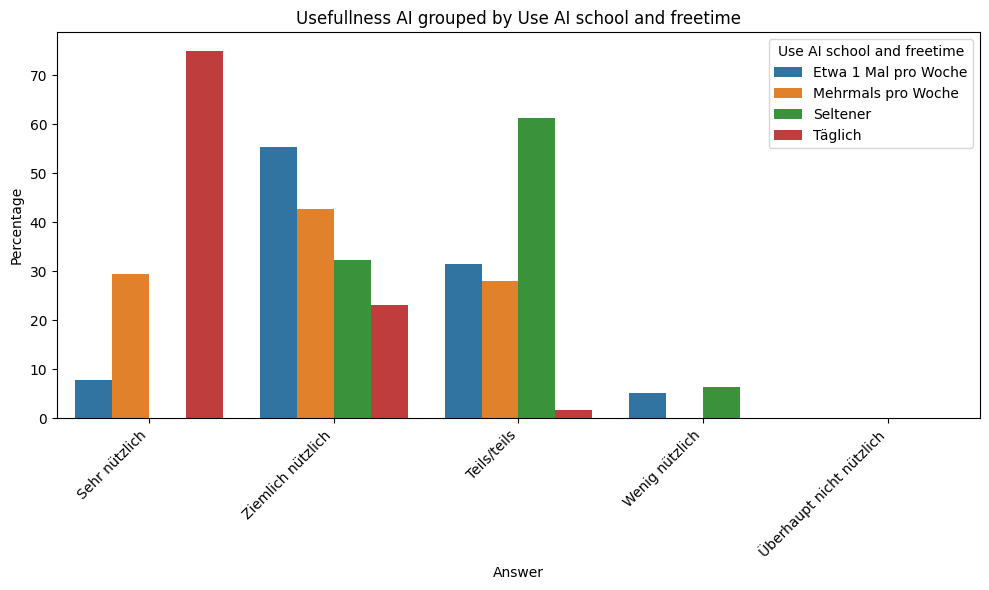

❌ Test failed for Concerns AIMost used subjects x Use AI school and freetime: "['Concerns AIMost used subjects'] not in index"

📊 Reliability AI grouped by Use AI school and freetime
Reliability AI              Sehr verlässlich  Eher verlässlich  Teils/teils  Wenig verlässlich  Gar nicht verlässlich  Unsicher / Ich habe keine Meinung
Use AI school and freetime                                                                                                                              
Etwa 1 Mal pro Woche                     2.6              31.6         52.6                7.9                    0.0                                5.3
Mehrmals pro Woche                       4.4              51.5         35.3                7.4                    1.5                                0.0
Nie                                      0.0              20.0         50.0               10.0                   20.0                                0.0
Seltener                                 0.0        

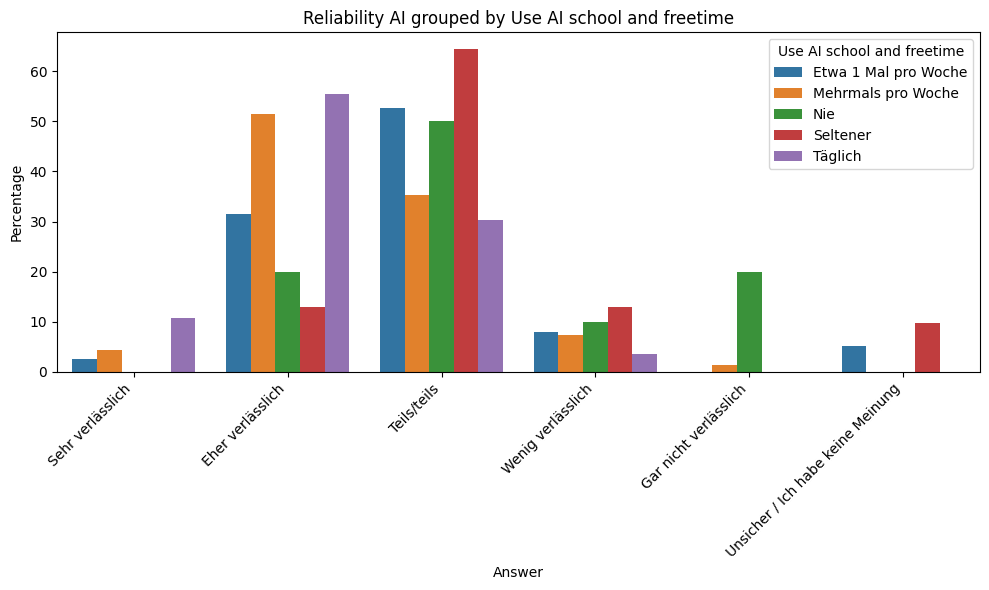


📊 Mates using AI grouped by Use AI school and freetime
Mates using AI              Nie  Selten  Manchmal   Oft  Immer
Use AI school and freetime                                    
Etwa 1 Mal pro Woche          0     2.6      42.1  47.4    7.9
Mehrmals pro Woche            0     0.0      16.4  70.1   13.4
Nie                           0    20.0      30.0  50.0    0.0
Seltener                      0     6.5      38.7  48.4    6.5
Täglich                       0     0.0       1.8  65.5   32.7


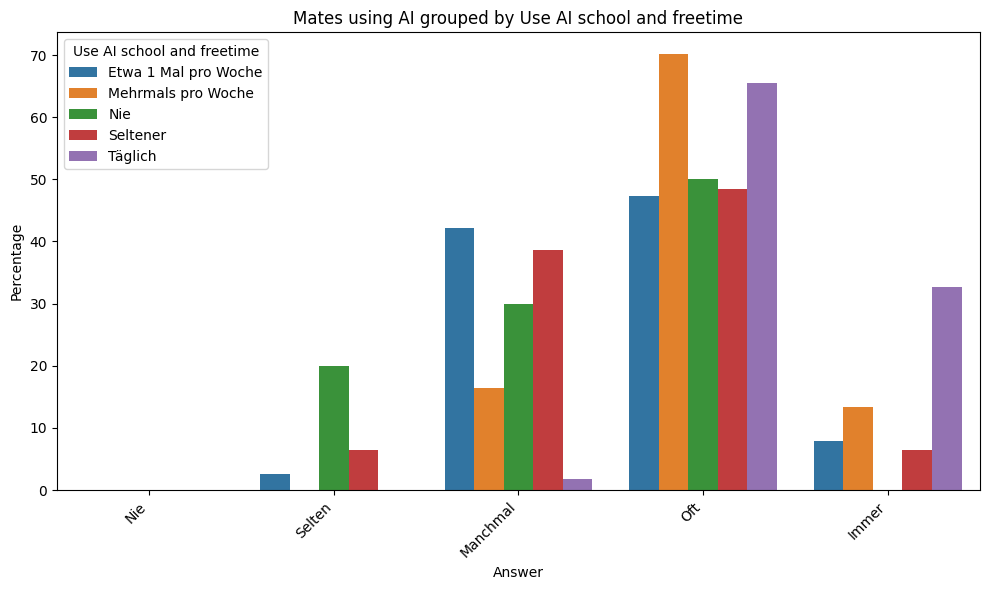


📊 Help of AI grouped by Use AI school and freetime
Help of AI                  Sehr gut  Eher gut  Neutral  Eher schlecht  Sehr schlecht
Use AI school and freetime                                                           
Etwa 1 Mal pro Woche             8.6      45.7     42.9            2.9              0
Mehrmals pro Woche              13.8      60.0     21.5            4.6              0
Nie                             66.7       0.0      0.0           33.3              0
Seltener                         3.7      29.6     44.4           22.2              0
Täglich                         32.7      50.0     15.4            1.9              0


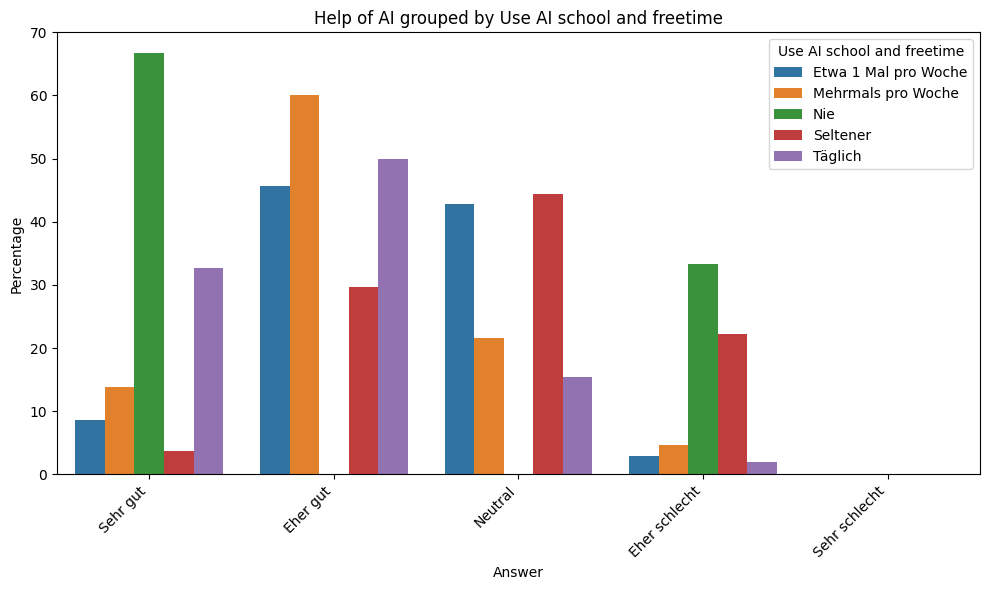


📊 Reliability AI grouped by Used AI
Reliability AI           Sehr verlässlich  Eher verlässlich  Teils/teils  Wenig verlässlich  Gar nicht verlässlich  Unsicher / Ich habe keine Meinung
Used AI                                                                                                                                              
Aria (Opera Browser AI)               0.0             100.0          0.0                0.0                    0.0                                0.0
Chai AI                             100.0               0.0          0.0                0.0                    0.0                                0.0
Character.ai                        100.0               0.0          0.0                0.0                    0.0                                0.0
ChatGPT                               4.9              42.9         41.3                7.6                    0.5                                2.7
Claude AI                            25.0              25.0    

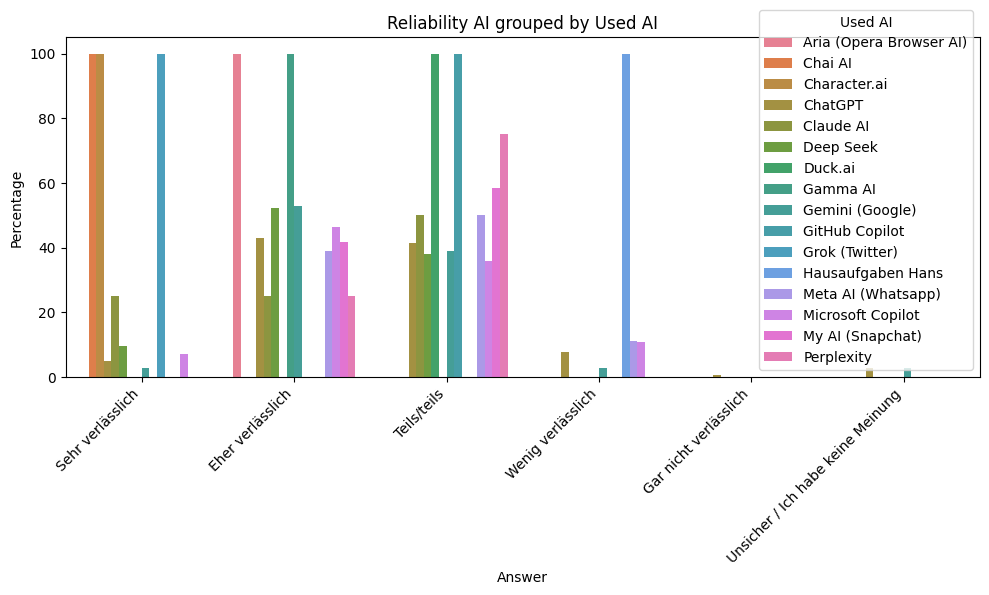


📊 Concerns AI grouped by Used AI
Concerns AI                 Ja   Nein  Ich habe darüber noch nie nachgedacht.
Used AI                                                                      
Aria (Opera Browser AI)  100.0    0.0                                     0.0
Chai AI                    0.0  100.0                                     0.0
Character.ai               0.0  100.0                                     0.0
ChatGPT                   37.5   37.0                                    25.5
Claude AI                 50.0   50.0                                     0.0
Deep Seek                 33.3   52.4                                    14.3
Duck.ai                  100.0    0.0                                     0.0
Gamma AI                   0.0  100.0                                     0.0
Gemini (Google)           30.6   47.2                                    22.2
GitHub Copilot           100.0    0.0                                     0.0
Grok (Twitter)             0.0

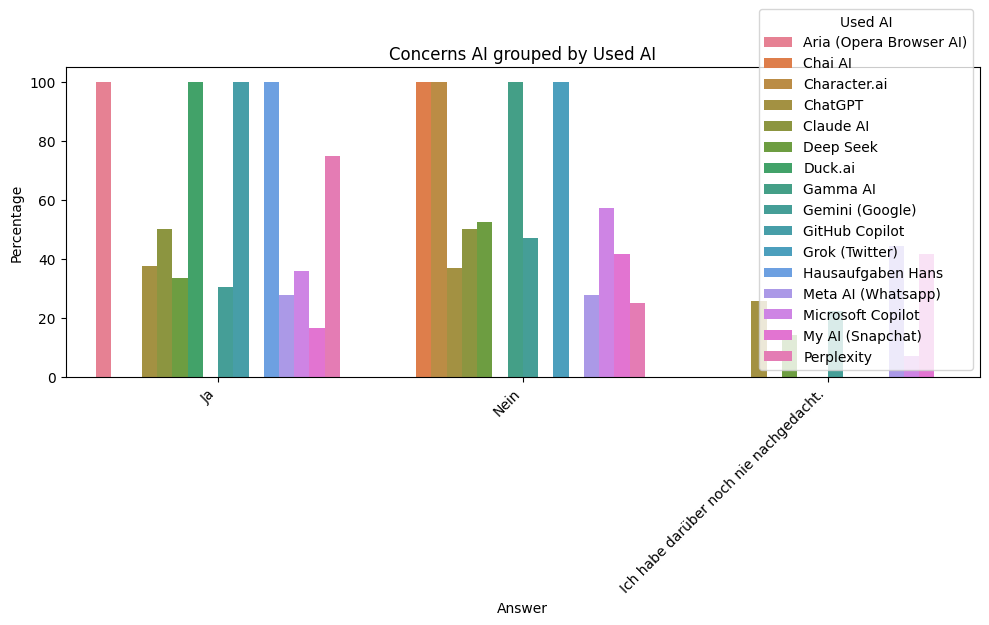


📊 Deal with AI grouped by Understanding AI
Deal with AI             Sehr gut  Eher gut  Weder gut noch schlecht  Eher schlecht  Gar nicht
Understanding AI                                                                              
Eher gut                     25.9      50.0                     24.1            0.0          0
Eher wenig                    3.1      34.4                     50.0            9.4          0
Gar nicht                    14.3      71.4                     14.3            0.0          0
Sehr gut                     88.9      11.1                      0.0            0.0          0
Weder gut noch schlecht      15.9      54.5                     25.0            4.5          0


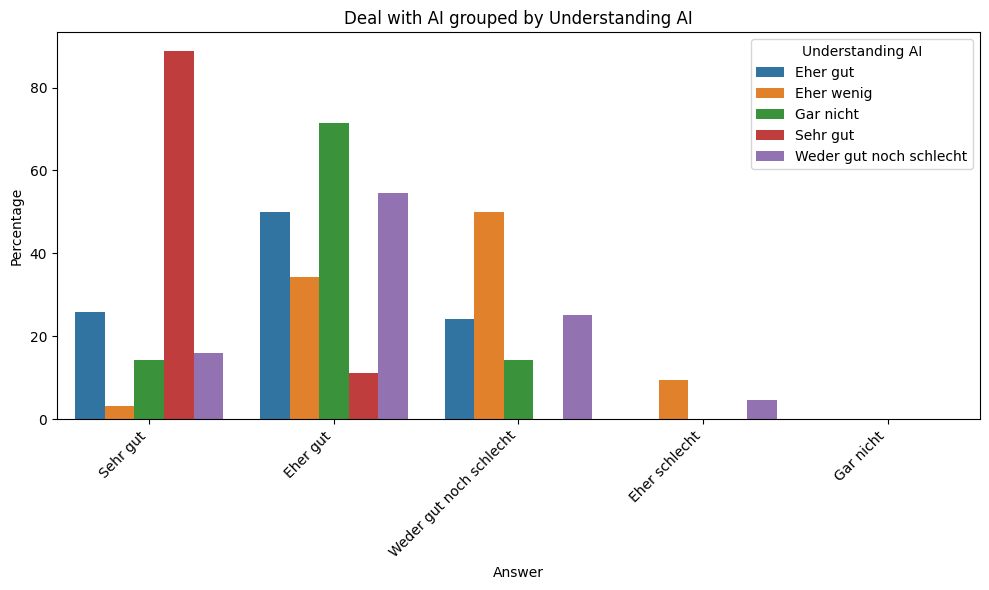

❌ Test failed for Understanding AI x Understanding AI: 'DataFrame' object has no attribute 'str'

📊 True_False_Score grouped by Understanding AI
True_False_Score            0     1     2     3     4     5     6
Understanding AI                                                 
Eher gut                  5.2   6.9  10.3  13.8  29.3  15.5  19.0
Eher wenig                3.1   9.4  18.8  25.0   9.4  21.9  12.5
Gar nicht                28.6   0.0   0.0   0.0  28.6  28.6  14.3
Sehr gut                  5.6   5.6   5.6  27.8  33.3  11.1  11.1
Weder gut noch schlecht   2.3  11.4  15.9  14.8  15.9  23.9  15.9


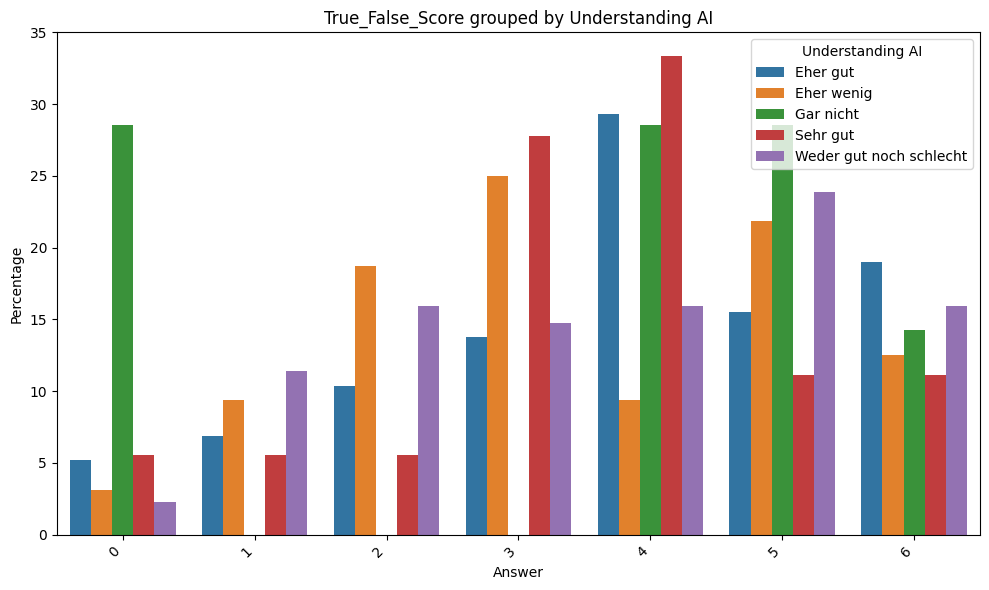


📊 Internet Understanding (Grouped) grouped by Understanding AI
Internet Understanding (Grouped)  Sehr schlechtes Verständnis  Schlechtes Verständnis  Mittelmässiges Verständnis  Gutes Verständnis  Sehr gutes Verständnis
Understanding AI                                                                                                                                            
Eher gut                                                 13.8                    22.4                        27.6               22.4                    13.8
Eher wenig                                               31.2                    37.5                        18.8               12.5                     0.0
Gar nicht                                                28.6                    42.9                        28.6                0.0                     0.0
Sehr gut                                                 16.7                    11.1                        11.1               27.8                   

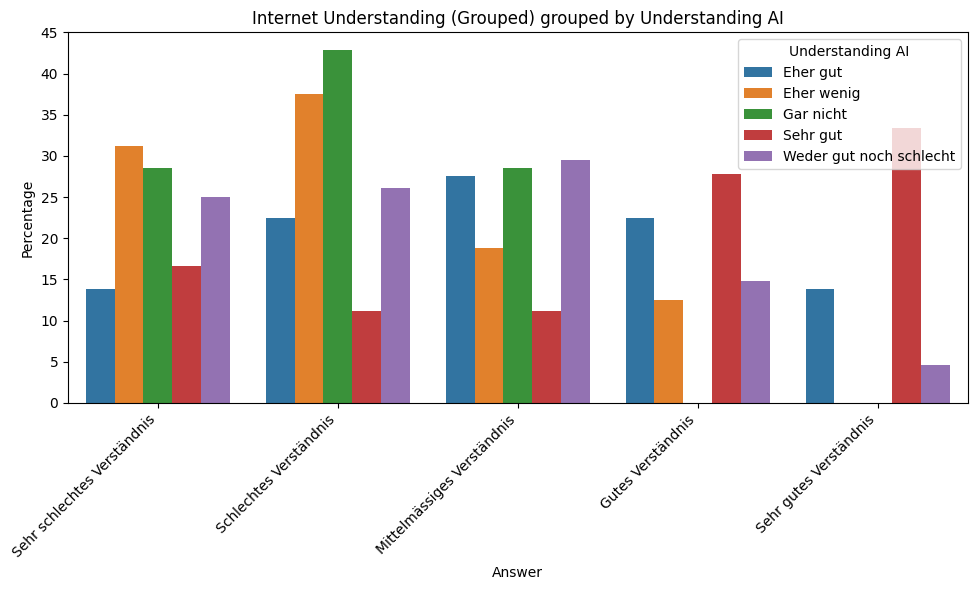


📊 True_False_Score grouped by Internet Understanding (Grouped)
True_False_Score                     0     1     2     3     4     5     6
Internet Understanding (Grouped)                                          
Sehr schlechtes Verständnis       13.3  26.7  17.8  15.6  11.1  11.1   4.4
Schlechtes Verständnis             3.8   5.7  22.6  15.1  18.9  26.4   7.5
Mittelmässiges Verständnis         1.9   3.8   9.6  21.2  17.3  17.3  28.8
Gutes Verständnis                  0.0   2.9   5.7  14.3  31.4  22.9  22.9
Sehr gutes Verständnis             0.0   0.0   0.0  16.7  38.9  27.8  16.7


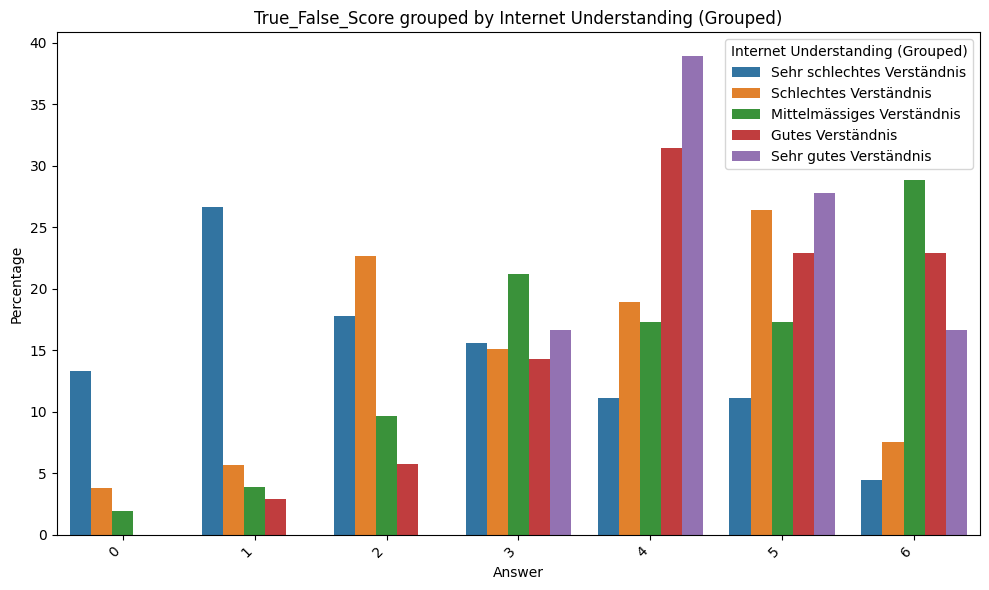


📊 Teachers preparing lessons grouped by Reliability AI
Teachers preparing lessons         Stört mich sehr  Stört mich ein wenig  Neutral / Mir egal  Finde ich gut  Finde ich sehr gut
Reliability AI                                                                                                                 
Eher verlässlich                               7.1                  20.2                59.5            9.5                 3.6
Gar nicht verlässlich                        100.0                   0.0                 0.0            0.0                 0.0
Sehr verlässlich                              20.0                   0.0                60.0           20.0                 0.0
Teils/teils                                    9.3                  30.2                54.7            4.7                 1.2
Unsicher / Ich habe keine Meinung              0.0                   0.0               100.0            0.0                 0.0
Wenig verlässlich                             20

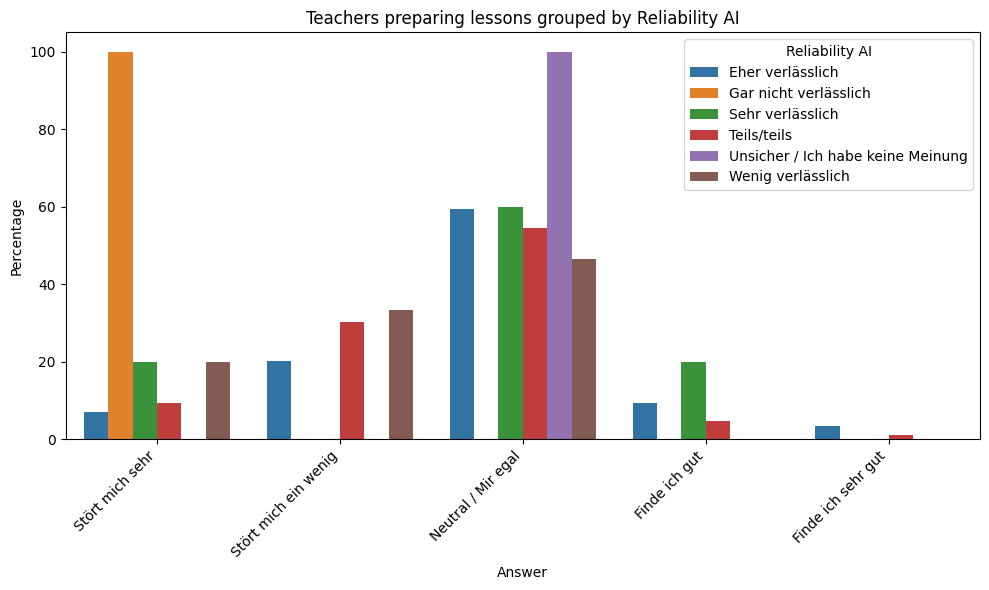


📊 Teachers giving grades grouped by Reliability AI
Teachers giving grades             Stört mich sehr  Stört mich ein wenig  Neutral / Mir egal  Finde ich gut  Finde ich sehr gut
Reliability AI                                                                                                                 
Eher verlässlich                              40.5                  31.0                22.6            3.6                 2.4
Gar nicht verlässlich                        100.0                   0.0                 0.0            0.0                 0.0
Sehr verlässlich                              30.0                  20.0                20.0           30.0                 0.0
Teils/teils                                   65.1                  22.1                10.5            1.2                 1.2
Unsicher / Ich habe keine Meinung             20.0                  20.0                60.0            0.0                 0.0
Wenig verlässlich                             73.3  

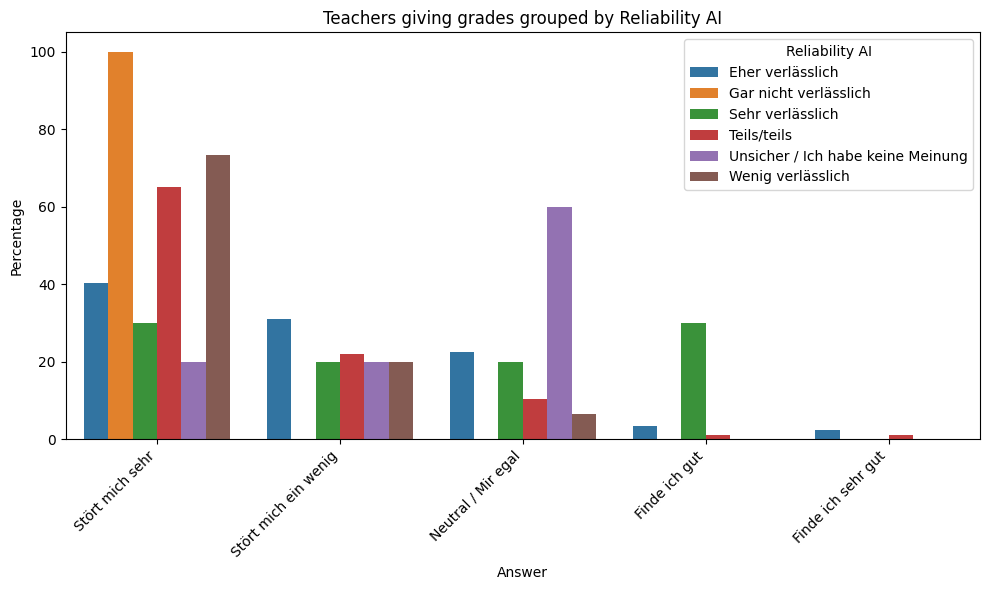

❌ Test failed for Help of AI x Frequency of use AI_school: "['Frequency of use AI_school'] not in index"


In [2]:
# Setup
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# imports
sys.path.append(os.path.abspath(".."))
from answer_categories import question_orders
from lists import comparison_pairs_by_AI_questions, single_choice_questions, multiple_choice_questions
from Helper_funtions import (
    calculate_true_false_score,
    clean_up_subjects,
    calculate_Internet_terms_understanding_score,
    group_internet_understanding
)

# load excel
file_path = os.path.join("..", "Data", "Fertige Tabelle.xlsx")
df =  pd.read_excel(file_path)
df.columns = df.columns.str.strip()

# reduce nr of subjects to a max of 3
df = clean_up_subjects(df, "Most used subjects")

# Calculate True/False score and add to DataFrame
df = calculate_true_false_score(df)

# Calculate the score
df = calculate_Internet_terms_understanding_score(df)

df = group_internet_understanding(df)


for demo, question_list in comparison_pairs_by_AI_questions.items(): 
    for question in question_list:
        try:
            relevant_cols = [demo, question]
            data = df[relevant_cols].dropna()

            # Handle exploding if any of the two is multiple choice
            for col in relevant_cols:
                if col in multiple_choice_questions:
                    data[col] = data[col].astype(str).str.split(",")
                    data = data.explode(col)
                    data[col] = data[col].str.strip()

            # Drop any remaining empty entries
            data = data.dropna()
            data = data[(data[demo].astype(str).str.strip() != "") & (data[question].astype(str).str.strip() != "")]

            # Crosstab normalized by row (percentages)
            cross = pd.crosstab(data[demo], data[question], normalize='index') * 100

            # Apply predefined order
            if question in question_orders:
                order = question_orders[question]
                for col in order:
                    if col not in cross.columns:
                        cross[col] = 0
                cross = cross[order]

            if pd.api.types.is_numeric_dtype(data[demo]):
                cross = cross.sort_index()

            print(f"\n📊 {question} grouped by {demo}")
            print(cross.round(1).to_string())

            # Plot
            plot_df = cross.reset_index().melt(id_vars=demo, var_name="Answer", value_name="Percentage")

            plt.figure(figsize=(10, 6))
            sns.barplot(data=plot_df, x="Answer", y="Percentage", hue=demo)
            plt.title(f"{question} grouped by {demo}")
            plt.xticks(rotation=45, ha="right")
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"❌ Test failed for {question} x {demo}: {e}")
